<a href="https://colab.research.google.com/github/frogbysachs/LASA-Data-Science/blob/main/Copy_of_Unit8ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 8 Exercises: The Art of BART

These exercises are grouped into two parts:

- Questions on the nature of decision trees, random forests, and BART models
- An oppurtunity to practice implementing and analyzing a BART model.

Enjoy!

## Bartian Theory

**Task1**:

Draw a decision tree--on a physical piece of paper--that predicts how much time you'll spend studying on a given day, using the amount of sleep you got the night before as a predictor.

If this seems to easy, then add another variable or two (test tomorrow? activity after school?), and/or increase the depth of your tree.

You do not have to show me or turn in your tree to earn credit for this question, although I would like to see your drawing.

**Task2**:

What is a decision tree? How do they work?

A decision tree is a flowchart that uses yes-or-no questions (or greater than-less than) to predict values for the predicted variable. Using the "tree" library, decision trees also include the number of data points that fall into that outcome (leaf), squared error, and an estimated y-value based on the x-value range given.

**Task3**:

What does the "depth" of a decision tree mean?

How do I know if a tree is too deep, or not deep enough?

The depth of a decision tree is how much specificity the tree is going to have. For example if the tree is making two decisions, then the depth of that tree is 2; the more decisions a tree makes, the more complicated the outcome graph will look.

A tree being "too deep" is identical to the idea of overfitting- if the outcome graph looks overly complicated or unrealistic as a trend for the data, it's too deep. If it doesn't seem to accurately reflect the data at all, it's probably underfitting, or "not deep enough".

**Task4:**

How are BART models similar and different from a decision tree?

A BART model is an aggregate of a bunch of different decision trees, with some amount of randomization. In this way, the similarity is that BART models and decision trees are made up of the exact same components (binary trees), but since BART uses random variation in decision-making to capture as many different data patterns as possible, a BART model won't end up looking like a decision tree. Furthermore, BART uses MCMC to decide what the next change to a tree will be, meaning that there's much more complexity in BART.

**Task5**:

Why would we use a BART model instead of a decision tree?

The biggest downfall of using decision trees is that each decision is made in a binary way, which can lead to a ton of bias in the outcome- especially if you're trying to capture a complex data set. BART is particularly good at using shallow decision trees, meaning that we get the advantages of decision trees without as much risk for ridiculous overfitting.

## Bartian Penguins

**Task6**:

Create a BART model that uses flipper length, bill depth, and bill length to predict body mass in penguins, and make a ppc to check its fit

Code for loading the data is below. You'll need to do everything else yourself.

Remember to use my notes as a reference, and to copy and paste from them when it makes sense to.

Oh, and try a normal likelihood.

In [ ]:
!pip install preliz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.1/519.1 kB 8.5 MB/s eta 0:00:00


In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import preliz as pz
import seaborn as sns

In [ ]:
!pip install pymc-bart

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 518.9/518.9 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 25.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: pytensor
    Found existing installation: pytensor 2.28.3
    Uninstalling pytensor-2.28.3:
      Successfully uninstalled pytensor-2.28.3
  Attempting uninstall: pymc
    Found existing installation: pymc 5.21.1
    Uninstalling pymc-5.21.1:
      Successfully uninstalled pymc-5.21.1


In [ ]:
import pymc_bart as pmb

In [ ]:
#drop the incomplete rows from the data
url="https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/penguins.csv"
penguins = pd.read_csv(url).dropna()

In [ ]:
penguins.head()

,species,island,bill_length,bill_depth,flipper_length,body_mass,sex,year
0,Adelie,Torgersen,3.91,1.87,18.1,3.75,male,2007
1,Adelie,Torgersen,3.95,1.74,18.6,3.80,female,2007
2,Adelie,Torgersen,4.03,1.80,19.5,3.25,female,2007
4,Adelie,Torgersen,3.67,1.93,19.3,3.45,female,2007
5,Adelie,Torgersen,3.93,2.06,19.0,3.65,male,2007


In [ ]:
features = ["flipper_length", "bill_length", "bill_depth"]

X = penguins[features]#.to_numpy()#.reshape(-1, 1)
Y = penguins["body_mass"].to_numpy()

In [ ]:
with pm.Model() as model_penguins:
    s = pm.HalfNormal('s',1000)
    μ_ = pmb.BART("μ_", X, np.log(Y), m=50)
    μ = pm.Deterministic("μ",pm.math.exp(μ_))
    y = pm.Normal("y", mu=μ, sigma=s,  observed=Y)
    idata_penguins = pm.sample(compute_convergence_checks=False)

Output()

Output()

<Axes: xlabel='y'>

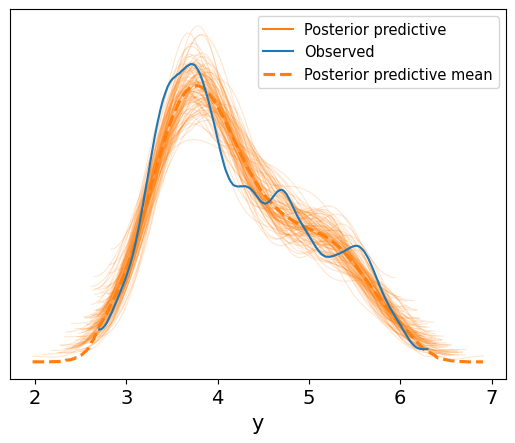

In [ ]:
pm.sample_posterior_predictive(idata_penguins,model_penguins, extend_inferencedata=True)
az.plot_ppc(idata_penguins, num_pp_samples=100, colors=["C1", "C0", "C1"])

**Task7**:

Plot flipper length versus body mass,

and then plot the posterior predictve from the model over the data.
You're going to copy paste the plotting code from the notes, fyi.

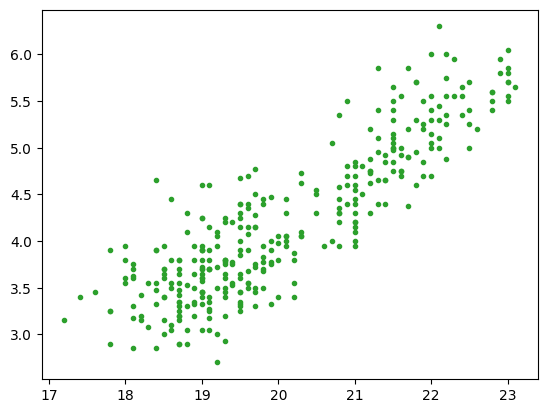

In [ ]:
plt.plot(penguins.flipper_length, penguins.body_mass, "C2.", zorder=-3)

In [ ]:
posterior_mean = idata_penguins.posterior["μ"]

μ_hdi = az.hdi(ary=idata_penguins, group="posterior", var_names=["μ"], hdi_prob=0.74)

pps = az.extract(
    idata_penguins, group="posterior_predictive", var_names=["y"]
).T

/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


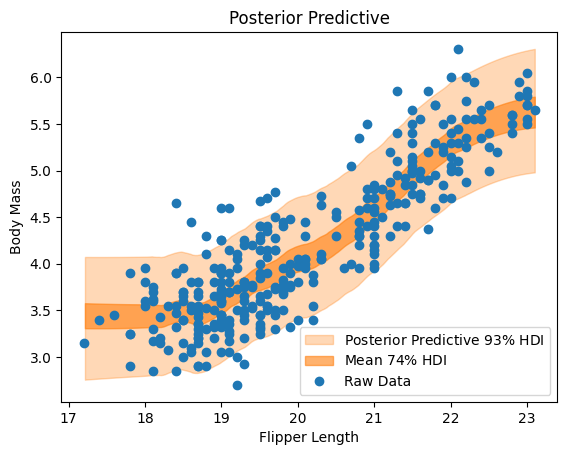

In [ ]:
idx = np.argsort(X[:, 0])
fig, ax = plt.subplots()

az.plot_hdi(
    x=X[:, 0],
    y=pps,
    ax=ax,
    hdi_prob=0.93,
    fill_kwargs={"alpha": 0.3, "label": r"Posterior Predictive $93\%$ HDI"},
)

az.plot_hdi(
    x=X[:, 0],
    y=posterior_mean,
    ax=ax,
    hdi_prob=0.74,
    fill_kwargs={"alpha": 0.6, "label": r"Mean $74\%$ HDI"},
)
ax.plot(penguins["flipper_length"], penguins["body_mass"], "o", c="C0", label="Raw Data")
ax.legend(loc="lower right")
ax.set(
    title="Posterior Predictive",
    xlabel="Flipper Length",
    ylabel="Body Mass",
);

**Task8**:

Interpret the plot above in context. Do you think it captures the true association between flipper length and body mass in penguins? Why or why not? Make sure to reference specific things you see in the plot.

On the most basic level, I think the model is correct that there is a positive association between flipper length and body mass. I also really like that the posterior flattens out at the lower and upper ends of the flipper length range, because realistically, it shouldn't be true that there's a strictly linear trend- at some point, the flipper length can't get much longer, no matter how fat or thin the penguin is. Overall, I think this predictive plot is quite solid.

**Task9**:

Create partial depnedence plots (pdps), individual conditional expectation (ice) plots, and a variable importance plot for the BARTpenguin model.

array([<Axes: xlabel='flipper_length'>, <Axes: xlabel='bill_length'>,
       <Axes: xlabel='bill_depth'>], dtype=object)

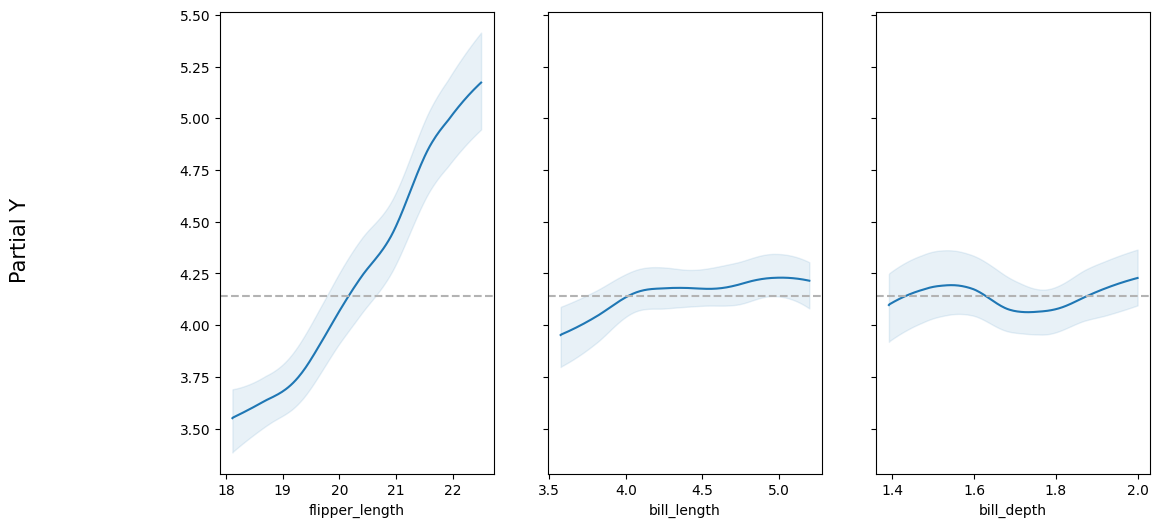

In [ ]:
pmb.plot_pdp(μ_, X, Y, grid=(1, 3), func=np.exp, figsize = (12,6))

array([<Axes: xlabel='flipper_length'>, <Axes: xlabel='bill_length'>,
       <Axes: xlabel='bill_depth'>], dtype=object)

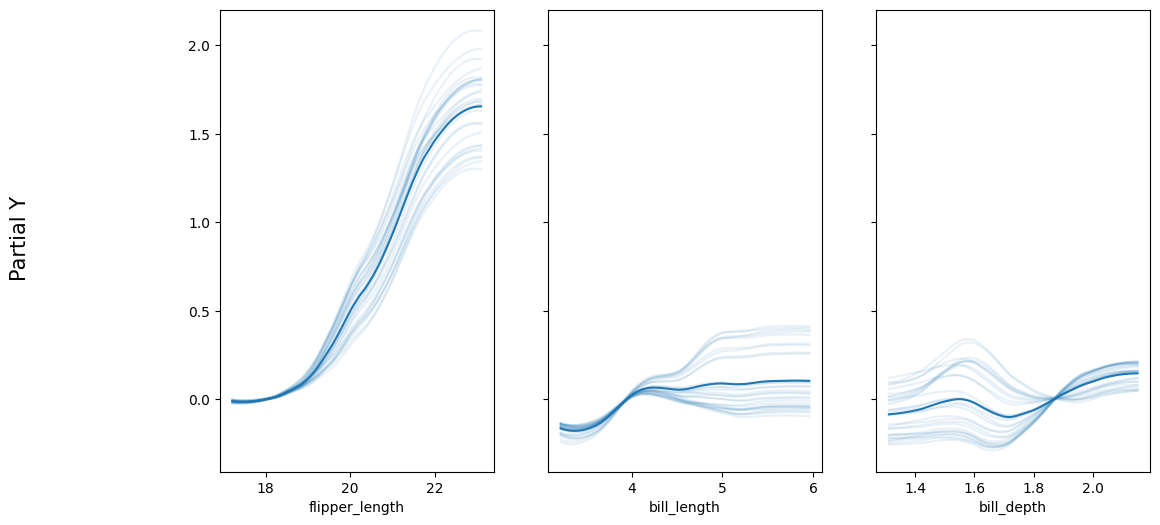

In [ ]:
pmb.plot_ice( μ_, X, Y, grid=(1, 3), func=np.exp, figsize = (12,6))

<Axes: ylabel='R²'>

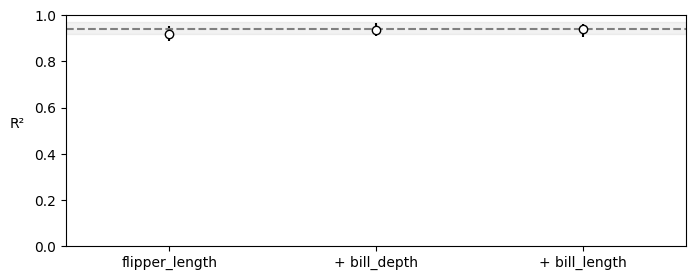

In [ ]:
vi_penguins = pmb.compute_variable_importance(idata_penguins, μ_, X)
pmb.plot_variable_importance(vi_penguins)

**Task10**:

Using the above plots, make an argument about which variable(s) is/are most important in predicting body mass in penguins.

What is the relationship for each variable to body mass, when you take the other variables into account?

Is that relationship complicated by interactions between variables? How do you know?

Make sure to reference specific things you see in each plot, to justify your decisions and comments.

I believe that flipper length is by far the most important variable in predicting body mass.

Our PDP plots show that flipper length is the only variable with a significantly identifiable relationship to body mass-- bill length and depth both show pretty shallow average slopes in their relationship to body mass, and instantaneous slopes for those two graphs are both pretty variable. This tells me that even when accounting for bill length and depth, flipper length is still a pretty good log-distribution-ish predictor of body mass.

Then, looking at the ICE plots, flipper length vs. body mass is very confident for the lowest values but there's a good bit of variation in the high values, meaning that it's at least a little bit important that we keep our other variables around to see interactions. Bill length also has a lot of variance on the upper end, and bill depth has a good bit of variance on the lower end. This tells me that the ICE plots are actually valuable, and we should probably keep all our variables in.

Finally, looking at VI plots gives me everything I need to know to confirm my initial hypothesis: from no variables to adding flipper length, we already get R^2≥0.9, and from there we get marginal increases (0.02 or so) each time we add another variable. So yes, bill length and depth add *something*, but it's not nearly on the same level of importance as flipper length.